**Referencias**

**Tutorial de referencia del proyecto**
https://www.youtube.com/watch?v=PqiwVp53ftU

**Otros enlaces de referencia**

https://www.youtube.com/watch?v=JL9RMCS4Sho

https://www.youtube.com/watch?v=Zt3tzGjLmPA

https://es.stackoverflow.com/questions/179702/python-gr%C3%A1ficos-de-excel-en-archivo-ya-existente-openpyxl

https://es.stackoverflow.com/questions/49891/ocultar-y-mostrar-hojas-de-excel-desde-python

**Carga de librerías**

In [37]:
import pandas as pd
import openpyxl
from openpyxl import load_workbook
from openpyxl import workbook
from openpyxl.styles import Font
from openpyxl.chart import BarChart, LineChart, Reference
import string
import matplotlib
import matplotlib.pyplot as plt



**Cargar datos desde página de Banco Mundial**

In [4]:
# Carga de los datos originales
df = pd.read_excel("https://api.worldbank.org/v2/es/indicator/FP.CPI.TOTL.ZG?downloadformat=excel", sheet_name= "Data", header= 3)


**Información a considerar por año: filtro por columna**

In [7]:
# Datos en un período seleccionado: 2000 - 2020
df_selec_anio = df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999'])
anio = df_selec_anio.round(2)



**Información a considerar por país: filtro por fila**

In [8]:
# Datos para un grupo de países seleccionados:
df_selec_pais = anio

lista_paises = ['Estados Unidos', 'Canadá', 'México', 'Costa Rica', 'Guatemala', 'Honduras', 'Nicaragua', 'Panamá', 'El Salvador', 'República Dominicana', 'Uruguay', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Perú', 'Paraguay', 
]
filtro = df_selec_pais["Country Name"].apply(lambda pais: pais in lista_paises)
salida = df_selec_pais.loc[filtro, :]

salida
#.style.set_table_styles([{"selector":"thead","props":"background-color:black; color:white;"},
#                                {"selector":"th.row_heading", "props": [("background-color", "gray"), ("color", "white"),
#                                          ("border", "3px solid black"), ("font-size", "1.2rem"), ("font-style", "italic")]},]).set_precision(2)



,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
28,Bolivia,4.61,1.59,0.93,3.34,4.44,5.39,4.28,8.71,14.01,...,9.88,4.52,5.74,5.77,4.06,3.62,2.82,2.27,1.84,0.94
29,Brasil,7.04,6.84,8.45,14.71,6.60,6.87,4.18,3.64,5.68,...,6.64,5.40,6.20,6.33,9.03,8.74,3.45,3.66,3.73,3.21
35,Canadá,2.72,2.53,2.26,2.76,1.86,2.21,2.00,2.14,2.37,...,2.91,1.52,0.94,1.91,1.13,1.43,1.60,2.27,1.95,0.72
39,Chile,3.84,3.57,2.49,2.81,1.05,3.05,3.39,4.41,8.72,...,3.34,3.01,1.79,4.72,4.35,3.79,2.18,2.43,2.56,3.05
45,Colombia,9.22,7.97,6.35,7.13,5.90,5.05,4.29,5.55,7.00,...,3.42,3.17,2.02,2.90,4.99,7.51,4.31,3.24,3.53,2.52
48,Costa Rica,10.96,11.26,9.17,9.45,12.31,13.80,11.47,9.36,13.42,...,4.88,4.50,5.23,4.52,0.80,-0.02,1.63,2.22,2.10,0.72
59,República Dominicana,7.72,8.88,5.22,27.45,51.46,4.19,7.57,6.14,10.64,...,5.80,3.69,4.83,3.00,0.84,1.61,3.28,3.56,1.81,3.78
92,Guatemala,5.98,7.29,8.13,5.60,7.58,9.11,6.56,6.82,11.36,...,6.21,3.78,4.34,3.42,2.39,4.45,4.42,3.75,3.70,3.21
97,Honduras,11.05,9.67,7.69,7.67,8.11,8.81,5.58,6.94,11.40,...,6.76,5.20,5.16,6.13,3.16,2.72,3.93,4.35,4.37,3.47
154,México,9.49,6.37,5.03,4.55,4.69,3.99,3.63,3.97,5.12,...,3.41,4.11,3.81,4.02,2.72,2.82,6.04,4.90,3.64,3.40


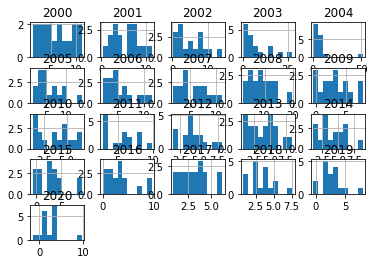

In [41]:
histogramas = salida.hist()

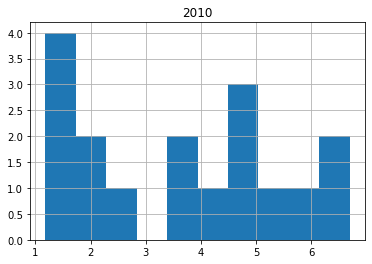

In [42]:
hist_10 = salida.hist("2010")

In [3]:
# Datos para un grupo de países seleccionados:
#df_selec_pais = anio

#lista_paises = ['Estados Unidos', 'Canadá', 'México', 'Costa Rica', 'Guatemala', 'Honduras', 'Nicaragua', 'Panamá', 'El Salvador', 'República Dominicana', 'Uruguay', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Perú', 'Paraguay', 
#]
#filtro = df_selec_pais["Country Name"].apply(lambda pais: pais in lista_paises)
#salida = df_selec_pais.loc[filtro, :]

#salida_nueva = salida.Figure(data=[go.Table(
#        header=dict(values=list(df.columns),
#                fill_color='paleturquoise',
#                align='left'),
#        cells=dict(values=[df.Rank, df.State, df.Postal, df.Population],
        
#        )
#        )
#)])

#salida


**Estadística Descriptiva**

In [17]:
est_descrip = salida.describe()
est_descrip_1 = est_descrip.round(2)


#.style.set_table_styles([{"selector":"thead","props":"background-color:black; color:white;"},
#                                {"selector":"th.row_heading", "props": [("background-color", "gray"), ("color", "white"),
#                                          ("border", "3px solid black"), ("font-size", "1.2rem"), ("font-style", "italic")]},]).set_precision(2)



In [18]:
grafica_1 = salida.T
grafica_1

,28,29,35,39,45,48,59,92,97,154,175,185,186,195,211,250,251
Country Name,Bolivia,Brasil,Canadá,Chile,Colombia,Costa Rica,República Dominicana,Guatemala,Honduras,México,Nicaragua,Panamá,Perú,Paraguay,El Salvador,Uruguay,Estados Unidos
2000,4.61,7.04,2.72,3.84,9.22,10.96,7.72,5.98,11.05,9.49,7.07,1.5,3.76,8.98,2.27,4.76,3.38
2001,1.59,6.84,2.53,3.57,7.97,11.26,8.88,7.29,9.67,6.37,5.99,0.31,1.98,7.27,3.75,4.36,2.83
2002,0.93,8.45,2.26,2.49,6.35,9.17,5.22,8.13,7.69,5.03,3.75,1.01,0.19,10.51,1.87,13.97,1.59
2003,3.34,14.71,2.76,2.81,7.13,9.45,27.45,5.6,7.67,4.55,5.3,0.39,2.26,14.24,2.12,19.38,2.27
2004,4.44,6.6,1.86,1.05,5.9,12.31,51.46,7.58,8.11,4.69,8.47,0.47,3.66,4.32,4.45,9.16,2.68
2005,5.39,6.87,2.21,3.05,5.05,13.8,4.19,9.11,8.81,3.99,9.6,2.86,1.62,6.81,4.69,4.7,3.39
2006,4.28,4.18,2.0,3.39,4.29,11.47,7.57,6.56,5.58,3.63,9.14,2.46,2.0,9.59,4.04,6.4,3.23
2007,8.71,3.64,2.14,4.41,5.55,9.36,6.14,6.82,6.94,3.97,11.13,4.17,1.78,8.13,4.58,8.11,2.85
2008,14.01,5.68,2.37,8.72,7.0,13.42,10.64,11.36,11.4,5.12,19.83,8.76,5.79,10.15,6.71,7.88,3.84


**Generando plantilla de Microsoft Excel**

A partir de aquí comienza la parametrización para automatizar la salida en Microsoft Excel

In [19]:
nombre = "Reporte_2020"


In [20]:
# Creando un excel en blanco
data_null={}
df_null=pd.DataFrame(data_null)
df_null.to_excel(f"CPI_{nombre}.xlsx", index = False)



In [43]:
# Agregando pestañas al Excel
def automatizar_excel(nombre_archivo):

    nombre = nombre_archivo
    writer = pd.ExcelWriter(f"CPI_{nombre}.xlsx")

    salida.to_excel(writer, "CPI_Reporte", startcol=1, startrow=1, index=False)    
    
    est_descrip_1.to_excel(writer, "CPI_Reporte_Stats", startcol=1, startrow=1, index=True)    

    grafica_1.to_excel(writer, "datos_graf", startcol=0, startrow=0, index=True)

    writer.save()

            #wb = load_workbook(f"CPI_{nombre}.xlsx")
            #pestaña = wb["datos_graf"].sheet_state = 'hidden'   

    return

automatizar_excel(nombre)

In [150]:
def ocutlar(nombre_archivo):
    
    nombre = nombre_archivo
    wb = load_workbook(f"CPI_{nombre}.xlsx")
    pestaña = wb["datos_graf"].sheet_state = 'hidden'

    wb.save(f"CPI_{nombre}.xlsx")

    return

ocutlar(nombre)


In [36]:
# Agregando pestañas al Excel
#def automatizar_excel(nombre_archivo):

 #   nombre = nombre_archivo
  #  writer = pd.ExcelWriter(f"CPI_{nombre}.xlsx")

  #  salida.to_excel(writer, "CPI_Reporte", startcol=1, startrow=1, index=False)    
    
  #  est_descrip.to_excel(writer, "CPI_Reporte_Stats", startcol=1, startrow=1, index=True)

  #  writer.save()  

  #  return

#automatizar_excel("reporte_2020")

In [44]:
def graficar():
    
    wb = load_workbook(f"CPI_{nombre}.xlsx")
    pestaña = wb["datos_graf"]    

    min_col = wb.active.min_column
    max_col = wb.active.max_column
    min_fila = wb.active.min_row
    max_fila = wb.active.max_row

    barchart = LineChart()    
    data = Reference(pestaña, min_col=min_col, max_col=max_col-5, min_row=min_fila, max_row=max_fila+4)
    categorias = Reference(pestaña, min_col=min_col-1, max_col=min_col-1, min_row=min_fila+1, max_row=max_fila+4)

    barchart.add_data(data, titles_from_data=True)
    barchart.set_categories(categorias)
    
    pestaña_2 = wb["CPI_Reporte"]
    pestaña_2.add_chart(barchart, "B24")
    barchart.title = "CPI: Países Seleccionados"
    barchart.style = 2
    barchart.height = 15
    barchart.width = 20

    pestaña_2["B1"] = "Serie histórica CPI por país"
    pestaña_2["B1"].font = Font("Arial", bold=True, size= 20)


    pestaña_2["B22"] = "Series de Tiempo"
    pestaña_2["B22"].font = Font("Arial", bold=True, size= 20)
    
    wb.save(f"CPI_{nombre}.xlsx")

graficar()

In [45]:
def titulos_stas():
    
    wb = load_workbook(f"CPI_{nombre}.xlsx")
    pestaña = wb["CPI_Reporte_Stats"] 
    
    pestaña["B1"] = "Estadísticas descriptivas de la serie CPI 2010-2020"
    pestaña["B1"].font = Font("Arial", bold=True, size= 20)

    wb.save(f"CPI_{nombre}.xlsx")

titulos_stas()